In [15]:
import pandas as pd
import numpy as np

import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, f1_score
import matplotlib.pyplot as plt


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_csv('/content/drive/MyDrive/Thalassemia/Thalassemia.csv')
data.head()

,Age_of_Participants,Gender,Marital_Status,Type_of_Family,Level_of_Education,Occupational_Status,Area_of_Residence,Economic_Class,Diagnosis,Severity,...,Physical_Functioning,Role_Physical,Bodily_Pain,Vitality,Mental_Health,Role_Emotional,Social_Functioning,Physical_Health_Summary,Total_SF_Score,Mental_Health_Status
0,15,Female,Single,Nuclear,Secondary school,High school student,Urban,Low income,E-beta-thalassaemia,Yes,...,75,100,90.0,65,92,100.0,50.0,82.3,80.1,Good
1,18,Male,Single,Nuclear,High School,High school student,Urban,Low income,E-beta-thalassaemia,Yes,...,100,100,100.0,90,92,100.0,50.0,94.0,89.6,Good
2,13,Female,Single,Nuclear,High School,High school student,Rural,Low income,E-beta-thalassaemia,No,...,100,100,70.0,100,100,100.0,75.0,90.0,91.5,Good
3,14,Female,Single,Joint,High School,High school student,Rural,Low income,E-beta-thalassaemia,No,...,100,100,100.0,90,92,100.0,52.5,94.0,89.9,Good
4,13,Male,Single,Nuclear,Primary school,High school student,Urban,Low income,E-beta-thalassaemia,Yes,...,65,100,55.0,70,92,100.0,42.5,72.3,73.9,Good


In [3]:
data

,Age_of_Participants,Gender,Marital_Status,Type_of_Family,Level_of_Education,Occupational_Status,Area_of_Residence,Economic_Class,Diagnosis,Severity,...,Physical_Functioning,Role_Physical,Bodily_Pain,Vitality,Mental_Health,Role_Emotional,Social_Functioning,Physical_Health_Summary,Total_SF_Score,Mental_Health_Status
0,15,Female,Single,Nuclear,Secondary school,High school student,Urban,Low income,E-beta-thalassaemia,Yes,...,75,100,90.0,65,92,100.0,50.0,82.3,80.1,Good
1,18,Male,Single,Nuclear,High School,High school student,Urban,Low income,E-beta-thalassaemia,Yes,...,100,100,100.0,90,92,100.0,50.0,94.0,89.6,Good
2,13,Female,Single,Nuclear,High School,High school student,Rural,Low income,E-beta-thalassaemia,No,...,100,100,70.0,100,100,100.0,75.0,90.0,91.5,Good
3,14,Female,Single,Joint,High School,High school student,Rural,Low income,E-beta-thalassaemia,No,...,100,100,100.0,90,92,100.0,52.5,94.0,89.9,Good
4,13,Male,Single,Nuclear,Primary school,High school student,Urban,Low income,E-beta-thalassaemia,Yes,...,65,100,55.0,70,92,100.0,42.5,72.3,73.9,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,12,Female,Single,Broken,Can read and write,High school student,Rural,Low income,E-beta-thalassaemia,Yes,...,65,0,67.5,35,48,100.0,20.0,50.2,50.4,Good
352,12,Male,Single,Joint,Primary school,High school student,Urban,Moderate income,E-beta-thalassaemia,Yes,...,65,0,35.0,40,64,100.0,20.0,46.3,50.2,Good
353,13,Female,Single,Nuclear,High School,High school student,Urban,Low income,Beta thalassemia major,Yes,...,100,100,77.5,45,68,100.0,20.0,63.5,61.4,Good
354,17,Female,Single,Nuclear,Secondary school,High school student,Rural,Low income,E-beta-thalassaemia,Yes,...,35,0,45.0,30,56,100.0,20.0,43.7,46.8,Poor


In [4]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Thalassemia/Thalassemia.csv')

# Replace null values in the 'Frequency_of_Blood_Transfusion' column with 'None'
data['Frequency_of_Blood_Transfusion'] = data['Frequency_of_Blood_Transfusion'].fillna('None')

# Save the modified dataset
data.to_csv('/content/drive/MyDrive/Thalassemia/Thalassemia1.csv', index=False)

print("Null values replaced and dataset saved as Thalassemia1.csv")


Null values replaced and dataset saved as Thalassemia1.csv


In [6]:
import pandas as pd

# Check for null values in each column
null_values = data.isnull().sum()

# Display the columns with null values
print(null_values)

Age_of_Participants               0
Gender                            0
Marital_Status                    0
Type_of_Family                    0
Level_of_Education                0
Occupational_Status               0
Area_of_Residence                 0
Economic_Class                    0
Diagnosis                         0
Severity                          0
Transfusion_Status                0
Frequency_of_Blood_Transfusion    0
Previous_3Months_Transfution      0
Splenectomy_Status                0
Comorbidities_Status              0
Ironchelating_Therapy_Status      0
Medical_Expense                   0
General_Health                    0
Physical_Functioning              0
Role_Physical                     0
Bodily_Pain                       0
Vitality                          0
Mental_Health                     0
Role_Emotional                    0
Social_Functioning                0
Physical_Health_Summary           0
Total_SF_Score                    0
Mental_Health_Status        

In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the Excel file
data = pd.read_csv('/content/drive/MyDrive/Thalassemia/Thalassemia1.csv')

# Initialize LabelEncoder
le = LabelEncoder()

# Apply label encoding to the specified columns
for col in ['Gender', 'Marital_Status', 'Type_of_Family','Level_of_Education', 'Occupational_Status', 'Area_of_Residence', 'Economic_Class', 'Diagnosis', 'Severity', 'Transfusion_Status', 'Frequency_of_Blood_Transfusion', 'Previous_3Months_Transfution', 'Splenectomy_Status', 'Comorbidities_Status', 'Ironchelating_Therapy_Status', 'Mental_Health_Status' ]:
    data[col] = le.fit_transform(data[col])

# Save the updated DataFrame to a new Excel file
data.to_csv('/content/drive/MyDrive/Thalassemia/Thalassemia2.csv', index=False)

# Display the first few rows of the updated DataFrame
data.head()

,Age_of_Participants,Gender,Marital_Status,Type_of_Family,Level_of_Education,Occupational_Status,Area_of_Residence,Economic_Class,Diagnosis,Severity,...,Physical_Functioning,Role_Physical,Bodily_Pain,Vitality,Mental_Health,Role_Emotional,Social_Functioning,Physical_Health_Summary,Total_SF_Score,Mental_Health_Status
0,15,0,1,2,6,1,1,1,1,1,...,75,100,90.0,65,92,100.0,50.0,82.3,80.1,0
1,18,1,1,2,2,1,1,1,1,1,...,100,100,100.0,90,92,100.0,50.0,94.0,89.6,0
2,13,0,1,2,2,1,0,1,1,0,...,100,100,70.0,100,100,100.0,75.0,90.0,91.5,0
3,14,0,1,1,2,1,0,1,1,0,...,100,100,100.0,90,92,100.0,52.5,94.0,89.9,0
4,13,1,1,2,5,1,1,1,1,1,...,65,100,55.0,70,92,100.0,42.5,72.3,73.9,0


In [17]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_csv('/content/drive/MyDrive/Thalassemia/Thalassemia2.csv')
data.head()

,Age_of_Participants,Gender,Marital_Status,Type_of_Family,Level_of_Education,Occupational_Status,Area_of_Residence,Economic_Class,Diagnosis,Severity,...,Physical_Functioning,Role_Physical,Bodily_Pain,Vitality,Mental_Health,Role_Emotional,Social_Functioning,Physical_Health_Summary,Total_SF_Score,Mental_Health_Status
0,15,0,1,2,6,1,1,1,1,1,...,75,100,90.0,65,92,100.0,50.0,82.3,80.1,0
1,18,1,1,2,2,1,1,1,1,1,...,100,100,100.0,90,92,100.0,50.0,94.0,89.6,0
2,13,0,1,2,2,1,0,1,1,0,...,100,100,70.0,100,100,100.0,75.0,90.0,91.5,0
3,14,0,1,1,2,1,0,1,1,0,...,100,100,100.0,90,92,100.0,52.5,94.0,89.9,0
4,13,1,1,2,5,1,1,1,1,1,...,65,100,55.0,70,92,100.0,42.5,72.3,73.9,0


In [18]:
data

,Age_of_Participants,Gender,Marital_Status,Type_of_Family,Level_of_Education,Occupational_Status,Area_of_Residence,Economic_Class,Diagnosis,Severity,...,Physical_Functioning,Role_Physical,Bodily_Pain,Vitality,Mental_Health,Role_Emotional,Social_Functioning,Physical_Health_Summary,Total_SF_Score,Mental_Health_Status
0,15,0,1,2,6,1,1,1,1,1,...,75,100,90.0,65,92,100.0,50.0,82.3,80.1,0
1,18,1,1,2,2,1,1,1,1,1,...,100,100,100.0,90,92,100.0,50.0,94.0,89.6,0
2,13,0,1,2,2,1,0,1,1,0,...,100,100,70.0,100,100,100.0,75.0,90.0,91.5,0
3,14,0,1,1,2,1,0,1,1,0,...,100,100,100.0,90,92,100.0,52.5,94.0,89.9,0
4,13,1,1,2,5,1,1,1,1,1,...,65,100,55.0,70,92,100.0,42.5,72.3,73.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,12,0,1,0,1,1,0,1,1,1,...,65,0,67.5,35,48,100.0,20.0,50.2,50.4,0
352,12,1,1,1,5,1,1,2,1,1,...,65,0,35.0,40,64,100.0,20.0,46.3,50.2,0
353,13,0,1,2,2,1,1,1,0,1,...,100,100,77.5,45,68,100.0,20.0,63.5,61.4,0
354,17,0,1,2,6,1,0,1,1,1,...,35,0,45.0,30,56,100.0,20.0,43.7,46.8,1


In [19]:

# Split features and target
X = data.drop('Mental_Health_Status', axis=1)
y = data['Mental_Health_Status']

# Display the encoded dataset
print(X)
print(y)

     Age_of_Participants  Gender  Marital_Status  Type_of_Family  \
0                     15       0               1               2   
1                     18       1               1               2   
2                     13       0               1               2   
3                     14       0               1               1   
4                     13       1               1               2   
..                   ...     ...             ...             ...   
351                   12       0               1               0   
352                   12       1               1               1   
353                   13       0               1               2   
354                   17       0               1               2   
355                   12       0               1               2   

     Level_of_Education  Occupational_Status  Area_of_Residence  \
0                     6                    1                  1   
1                     2                    1     

Feature Importance Scores (LDA with mutual information mapped to original features):
Total_SF_Score                    8.893423
Physical_Health_Summary           8.675773
Role_Emotional                    1.936702
Bodily_Pain                       1.803044
Social_Functioning                1.203860
Vitality                          0.819708
Mental_Health                     0.697371
Gender                            0.129505
Physical_Functioning              0.093104
Role_Physical                     0.076423
Previous_3Months_Transfution      0.071891
Occupational_Status               0.063160
General_Health                    0.057737
Splenectomy_Status                0.057112
Age_of_Participants               0.052009
Transfusion_Status                0.051269
Area_of_Residence                 0.049923
Severity                          0.046996
Comorbidities_Status              0.040362
Marital_Status                    0.039437
Economic_Class                    0.031246
Ironchelatin

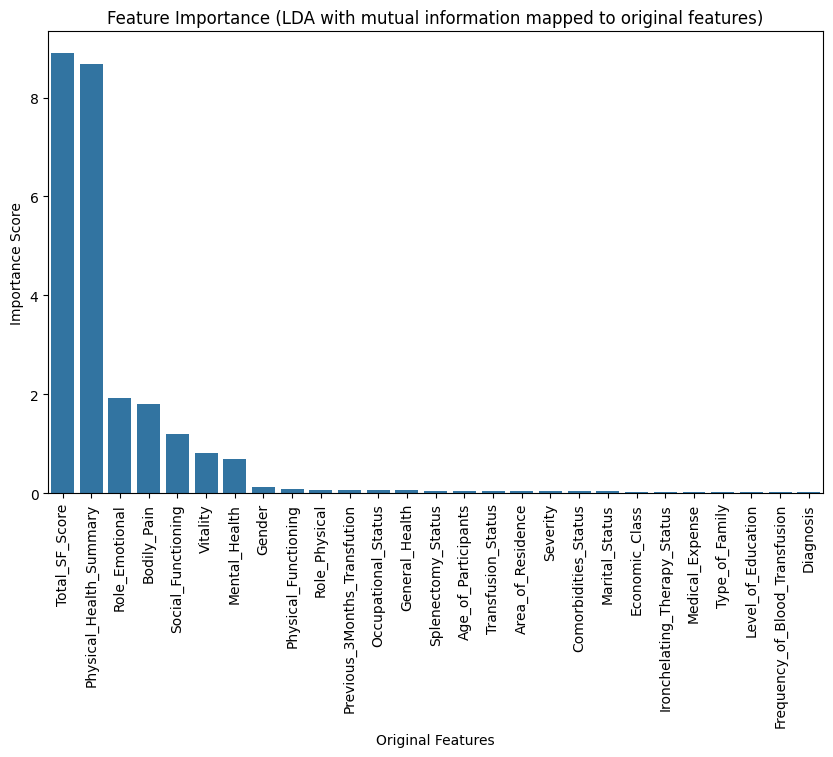


Selected Features (Threshold-Based Selection):
Total_SF_Score                    8.893423
Physical_Health_Summary           8.675773
Role_Emotional                    1.936702
Bodily_Pain                       1.803044
Social_Functioning                1.203860
Vitality                          0.819708
Mental_Health                     0.697371
Gender                            0.129505
Physical_Functioning              0.093104
Role_Physical                     0.076423
Previous_3Months_Transfution      0.071891
Occupational_Status               0.063160
General_Health                    0.057737
Splenectomy_Status                0.057112
Age_of_Participants               0.052009
Transfusion_Status                0.051269
Area_of_Residence                 0.049923
Severity                          0.046996
Comorbidities_Status              0.040362
Marital_Status                    0.039437
Economic_Class                    0.031246
Ironchelating_Therapy_Status      0.030528
Medica

In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import StratifiedKFold
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Initialize StratifiedKFold for cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Arrays to hold feature importance scores across folds
importance_scores = np.zeros(X.shape[1])

# Perform cross-validation
for train_index, test_index in kf.split(X_scaled, y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Apply LDA to reduce dimensionality (limited to min(n_classes-1, n_features))
    lda = LDA(n_components=min(len(np.unique(y)) - 1, X_train.shape[1]))
    X_train_lda = lda.fit_transform(X_train, y_train)
    X_test_lda = lda.transform(X_test)

    # Evaluate the importance of LDA components using mutual information
    mi = mutual_info_classif(X_train_lda, y_train)
    lda_importance = pd.Series(mi, index=[f'LD{i+1}' for i in range(X_train_lda.shape[1])]).sort_values(ascending=False)

    # Get the loadings (components)
    loadings = lda.scalings_

    # Calculate the importance of the original features
    original_feature_importance = np.abs(np.dot(loadings, lda_importance.values))
    importance_scores += original_feature_importance.flatten()

# Average the importance scores across folds
importance_scores /= kf.n_splits
original_feature_importance_series = pd.Series(importance_scores, index=X.columns).sort_values(ascending=False)

# Print the feature importance scores of the original features
print("Feature Importance Scores (LDA with mutual information mapped to original features):")
print(original_feature_importance_series)

# Plot the feature importance of the original features
plt.figure(figsize=(10, 6))
sns.barplot(x=original_feature_importance_series.index, y=original_feature_importance_series.values)
plt.title('Feature Importance (LDA with mutual information mapped to original features)')
plt.xlabel('Original Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=90)
plt.show()

# Threshold-Based Selection
threshold = 0.003
selected_features_threshold = original_feature_importance_series[original_feature_importance_series > threshold]
print("\nSelected Features (Threshold-Based Selection):")
print(selected_features_threshold)

# Top-N Features Selection
top_n = 10
selected_features_top_n = original_feature_importance_series.head(top_n)
print(f"\nSelected Top-{top_n} Features:")
print(selected_features_top_n)

# Cumulative Importance Selection
cumulative_importance_threshold = 0.80
cumulative_importance = original_feature_importance_series.cumsum() / original_feature_importance_series.sum()
selected_features_cumulative = original_feature_importance_series[cumulative_importance <= cumulative_importance_threshold]
print(f"\nSelected Features (Cumulative Importance up to {cumulative_importance_threshold * 100}%):")
print(selected_features_cumulative)


Feature Importance Scores (LDA with correlation-based importance):
Total_SF_Score                    0.901647
Role_Emotional                    0.784603
Physical_Health_Summary           0.767928
Role_Physical                     0.708721
Vitality                          0.688220
Mental_Health                     0.684205
Bodily_Pain                       0.495904
Physical_Functioning              0.448664
Social_Functioning                0.400501
General_Health                    0.305518
Gender                            0.166915
Type_of_Family                    0.144001
Age_of_Participants               0.138862
Marital_Status                    0.107506
Comorbidities_Status              0.085241
Transfusion_Status                0.084810
Medical_Expense                   0.084446
Splenectomy_Status                0.080527
Area_of_Residence                 0.055753
Ironchelating_Therapy_Status      0.054442
Frequency_of_Blood_Transfusion    0.039103
Previous_3Months_Transfution  

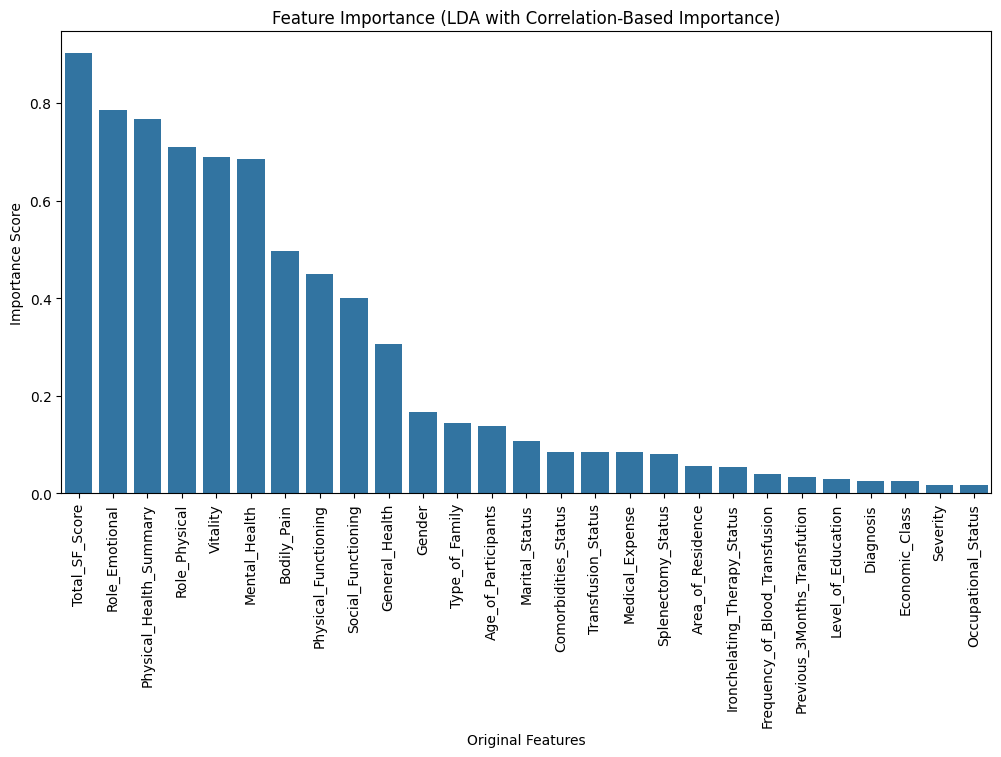

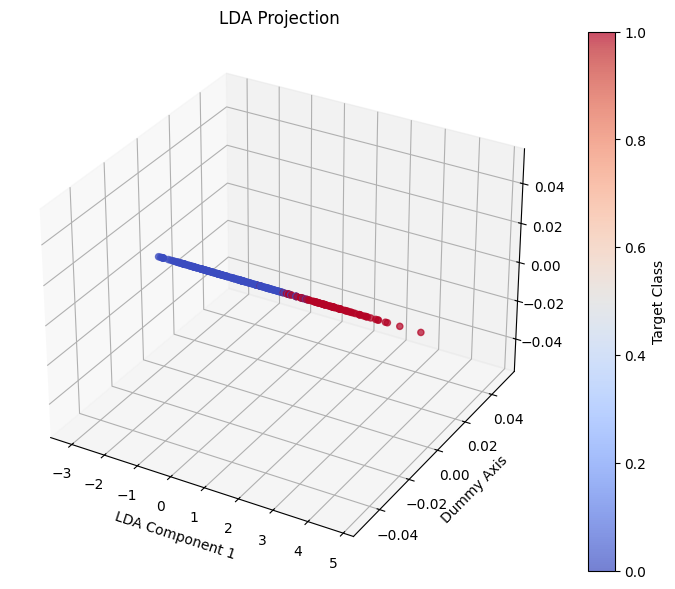


Selected Features (Threshold-Based Selection):
Total_SF_Score                    0.901647
Role_Emotional                    0.784603
Physical_Health_Summary           0.767928
Role_Physical                     0.708721
Vitality                          0.688220
Mental_Health                     0.684205
Bodily_Pain                       0.495904
Physical_Functioning              0.448664
Social_Functioning                0.400501
General_Health                    0.305518
Gender                            0.166915
Type_of_Family                    0.144001
Age_of_Participants               0.138862
Marital_Status                    0.107506
Comorbidities_Status              0.085241
Transfusion_Status                0.084810
Medical_Expense                   0.084446
Splenectomy_Status                0.080527
Area_of_Residence                 0.055753
Ironchelating_Therapy_Status      0.054442
Frequency_of_Blood_Transfusion    0.039103
Previous_3Months_Transfution      0.033392
Level_

In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import StratifiedKFold
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Initialize StratifiedKFold for cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Arrays to hold feature importance scores across folds
importance_scores = np.zeros(X.shape[1])

# Get the number of classes and features
n_features = X.shape[1]
n_classes = len(np.unique(y))

# Determine the maximum number of components for LDA
n_components = min(n_features, n_classes - 1, 3)  # We can reduce n_components if necessary

# Perform cross-validation
for train_index, test_index in kf.split(X_scaled, y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Apply LDA for dimensionality reduction (adjusting n_components)
    lda = LDA(n_components=n_components)
    X_train_lda = lda.fit_transform(X_train, y_train)

    # Compute correlation between original features and LDA components
    correlation_matrix = np.abs(np.corrcoef(X_train.T, X_train_lda.T)[:X_train.shape[1], X_train.shape[1]:])

    # Aggregate importance scores from all LDA dimensions
    feature_importance = np.sum(correlation_matrix, axis=1)

    # Accumulate importance scores
    importance_scores += feature_importance

# Average the importance scores across folds
importance_scores /= kf.n_splits
original_feature_importance_series = pd.Series(importance_scores, index=X.columns).sort_values(ascending=False)

# Print feature importance scores
print("Feature Importance Scores (LDA with correlation-based importance):")
print(original_feature_importance_series)

# Plot feature importance of the original features
plt.figure(figsize=(12, 6))
sns.barplot(x=original_feature_importance_series.index, y=original_feature_importance_series.values)
plt.title('Feature Importance (LDA with Correlation-Based Importance)')
plt.xlabel('Original Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=90)
plt.show()

# 3D Visualization of LDA
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Check the number of components in X_train_lda and plot accordingly
if X_train_lda.shape[1] == 3:
    scatter = ax.scatter(X_train_lda[:, 0], X_train_lda[:, 1], X_train_lda[:, 2], c=y_train, cmap='coolwarm', alpha=0.7)
    ax.set_xlabel('LDA Component 1')
    ax.set_ylabel('LDA Component 2')
    ax.set_zlabel('LDA Component 3')
elif X_train_lda.shape[1] == 2:
    scatter = ax.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train, cmap='coolwarm', alpha=0.7)
    ax.set_xlabel('LDA Component 1')
    ax.set_ylabel('LDA Component 2')
elif X_train_lda.shape[1] == 1:
    scatter = ax.scatter(X_train_lda[:, 0], np.zeros_like(X_train_lda[:, 0]), c=y_train, cmap='coolwarm', alpha=0.7)
    ax.set_xlabel('LDA Component 1')
    ax.set_ylabel('Dummy Axis')

plt.title('LDA Projection')

plt.colorbar(scatter, label='Target Class')
plt.show()


# Threshold-Based Selection
threshold = 0.003
selected_features_threshold = original_feature_importance_series[original_feature_importance_series > threshold]
print("\nSelected Features (Threshold-Based Selection):")
print(selected_features_threshold)

# Top-N Features Selection
top_n = 10
selected_features_top_n = original_feature_importance_series.head(top_n)
print(f"\nSelected Top-{top_n} Features:")
print(selected_features_top_n)

# Cumulative Importance Selection
cumulative_importance_threshold = 0.80
cumulative_importance = original_feature_importance_series.cumsum() / original_feature_importance_series.sum()
selected_features_cumulative = original_feature_importance_series[cumulative_importance <= cumulative_importance_threshold]
print(f"\nSelected Features (Cumulative Importance up to {cumulative_importance_threshold * 100}%):")
print(selected_features_cumulative)


Feature Importance Scores (t-SNE with correlation-based importance):
Total_SF_Score                    1.031107
Physical_Health_Summary           0.957444
Role_Physical                     0.877126
Vitality                          0.849127
Physical_Functioning              0.824305
Role_Emotional                    0.807992
Mental_Health                     0.797950
Transfusion_Status                0.727006
Bodily_Pain                       0.681933
Previous_3Months_Transfution      0.590381
Frequency_of_Blood_Transfusion    0.580690
Ironchelating_Therapy_Status      0.522585
Marital_Status                    0.501837
Age_of_Participants               0.492147
General_Health                    0.443562
Occupational_Status               0.381670
Economic_Class                    0.326144
Severity                          0.303027
Splenectomy_Status                0.301283
Social_Functioning                0.284272
Type_of_Family                    0.241632
Comorbidities_Status        

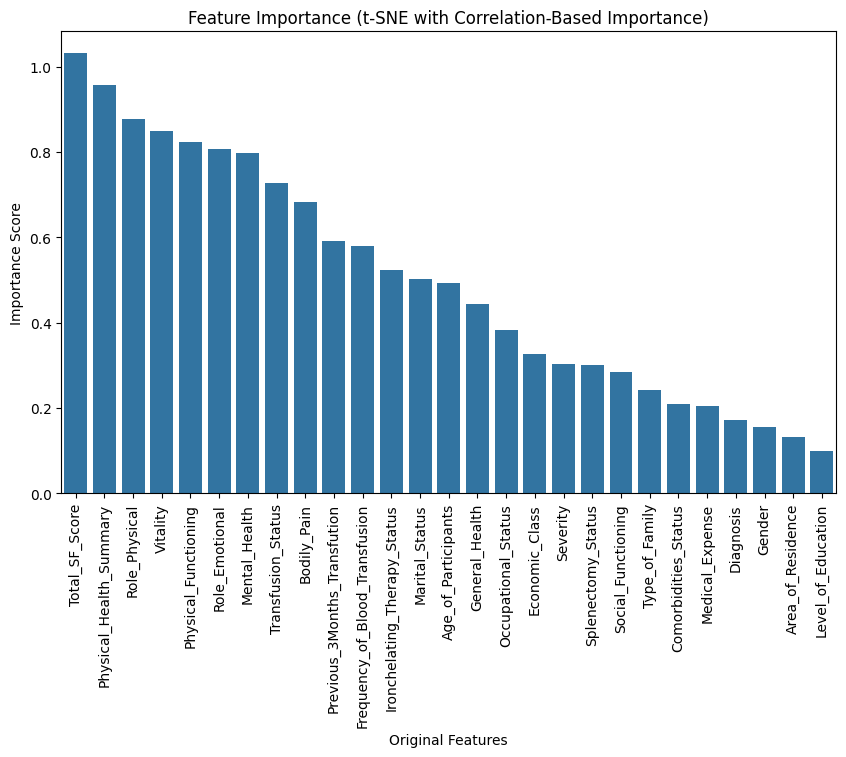


Selected Features (Threshold-Based Selection):
Total_SF_Score                    1.031107
Physical_Health_Summary           0.957444
Role_Physical                     0.877126
Vitality                          0.849127
Physical_Functioning              0.824305
Role_Emotional                    0.807992
Mental_Health                     0.797950
Transfusion_Status                0.727006
Bodily_Pain                       0.681933
Previous_3Months_Transfution      0.590381
Frequency_of_Blood_Transfusion    0.580690
Ironchelating_Therapy_Status      0.522585
Marital_Status                    0.501837
Age_of_Participants               0.492147
General_Health                    0.443562
Occupational_Status               0.381670
Economic_Class                    0.326144
Severity                          0.303027
Splenectomy_Status                0.301283
Social_Functioning                0.284272
Type_of_Family                    0.241632
Comorbidities_Status              0.210352
Medica

In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import StratifiedKFold
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Initialize StratifiedKFold for cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Arrays to hold feature importance scores across folds
importance_scores = np.zeros(X.shape[1])

# Perform cross-validation
for train_index, test_index in kf.split(X_scaled, y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Apply t-SNE to reduce dimensionality
    tsne = TSNE(n_components=2, random_state=42, perplexity=30)  # Adjust perplexity if needed
    X_train_tsne = tsne.fit_transform(X_train)

    # Compute correlation between original features and t-SNE components
    correlation_matrix = np.abs(np.corrcoef(X_train.T, X_train_tsne.T)[:X_train.shape[1], X_train.shape[1]:])

    # Aggregate importance scores from both t-SNE dimensions
    feature_importance = np.sum(correlation_matrix, axis=1)

    # Accumulate importance scores
    importance_scores += feature_importance

# Average the importance scores across folds
importance_scores /= kf.n_splits
original_feature_importance_series = pd.Series(importance_scores, index=X.columns).sort_values(ascending=False)

# Print the feature importance scores of the original features
print("Feature Importance Scores (t-SNE with correlation-based importance):")
print(original_feature_importance_series)

# Plot the feature importance of the original features
plt.figure(figsize=(10, 6))
sns.barplot(x=original_feature_importance_series.index, y=original_feature_importance_series.values)
plt.title('Feature Importance (t-SNE with Correlation-Based Importance)')
plt.xlabel('Original Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=90)
plt.show()

# Threshold-Based Selection
threshold = 0.003
selected_features_threshold = original_feature_importance_series[original_feature_importance_series > threshold]
print("\nSelected Features (Threshold-Based Selection):")
print(selected_features_threshold)

# Top-N Features Selection
top_n = 10
selected_features_top_n = original_feature_importance_series.head(top_n)
print(f"\nSelected Top-{top_n} Features:")
print(selected_features_top_n)

# Cumulative Importance Selection
cumulative_importance_threshold = 0.80
cumulative_importance = original_feature_importance_series.cumsum() / original_feature_importance_series.sum()
selected_features_cumulative = original_feature_importance_series[cumulative_importance <= cumulative_importance_threshold]
print(f"\nSelected Features (Cumulative Importance up to {cumulative_importance_threshold * 100}%):")
print(selected_features_cumulative)


Feature Importance Scores (3D t-SNE with correlation-based importance):
Total_SF_Score                    1.324865
Physical_Health_Summary           1.268239
Vitality                          1.069640
Physical_Functioning              1.033402
Role_Physical                     1.014234
Mental_Health                     0.995438
Bodily_Pain                       0.966959
Role_Emotional                    0.929588
Transfusion_Status                0.872148
Marital_Status                    0.814627
Previous_3Months_Transfution      0.811313
Frequency_of_Blood_Transfusion    0.780778
Age_of_Participants               0.736456
Ironchelating_Therapy_Status      0.660820
General_Health                    0.609556
Severity                          0.531324
Splenectomy_Status                0.505930
Occupational_Status               0.478235
Economic_Class                    0.465295
Social_Functioning                0.439023
Medical_Expense                   0.430664
Diagnosis                

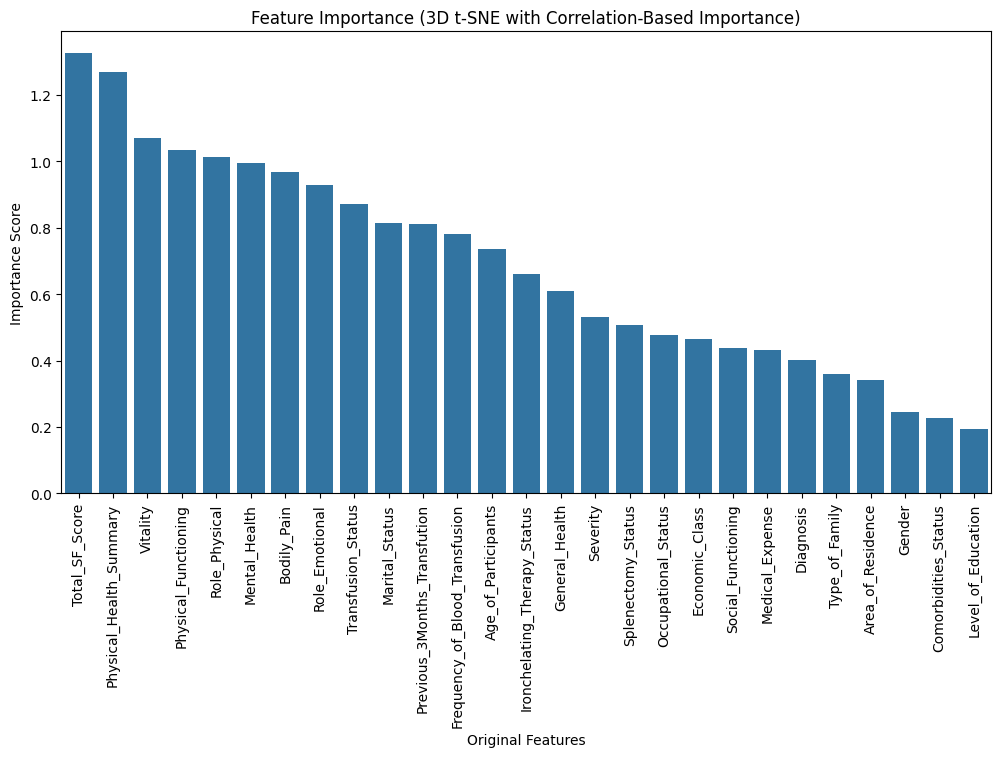

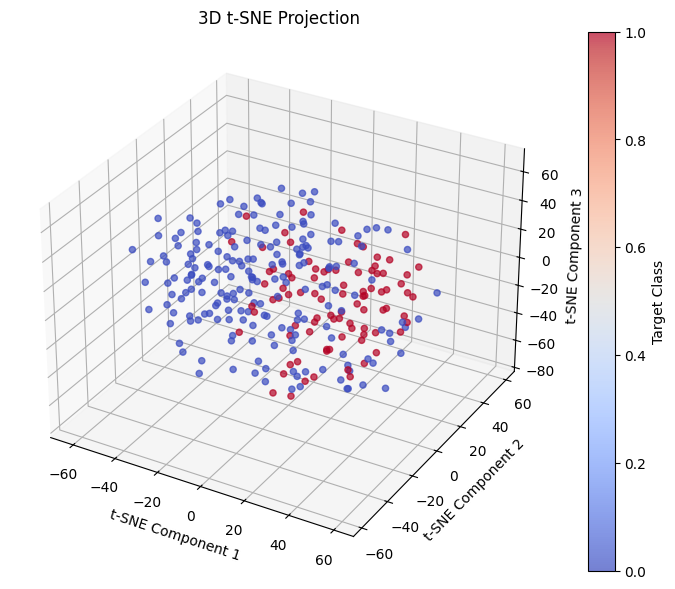


Selected Features (Threshold-Based Selection):
Total_SF_Score                    1.324865
Physical_Health_Summary           1.268239
Vitality                          1.069640
Physical_Functioning              1.033402
Role_Physical                     1.014234
Mental_Health                     0.995438
Bodily_Pain                       0.966959
Role_Emotional                    0.929588
Transfusion_Status                0.872148
Marital_Status                    0.814627
Previous_3Months_Transfution      0.811313
Frequency_of_Blood_Transfusion    0.780778
Age_of_Participants               0.736456
Ironchelating_Therapy_Status      0.660820
General_Health                    0.609556
Severity                          0.531324
Splenectomy_Status                0.505930
Occupational_Status               0.478235
Economic_Class                    0.465295
Social_Functioning                0.439023
Medical_Expense                   0.430664
Diagnosis                         0.400564
Type_o

In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import StratifiedKFold
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Initialize StratifiedKFold for cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Arrays to hold feature importance scores across folds
importance_scores = np.zeros(X.shape[1])

# Perform cross-validation
for train_index, test_index in kf.split(X_scaled, y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Apply t-SNE with 3D projection
    tsne = TSNE(n_components=3, random_state=42, perplexity=30)
    X_train_tsne = tsne.fit_transform(X_train)

    # Compute correlation between original features and t-SNE components
    correlation_matrix = np.abs(np.corrcoef(X_train.T, X_train_tsne.T)[:X_train.shape[1], X_train.shape[1]:])

    # Aggregate importance scores from all three t-SNE dimensions
    feature_importance = np.sum(correlation_matrix, axis=1)

    # Accumulate importance scores
    importance_scores += feature_importance

# Average the importance scores across folds
importance_scores /= kf.n_splits
original_feature_importance_series = pd.Series(importance_scores, index=X.columns).sort_values(ascending=False)

# Print feature importance scores
print("Feature Importance Scores (3D t-SNE with correlation-based importance):")
print(original_feature_importance_series)

# Plot feature importance of the original features
plt.figure(figsize=(12, 6))
sns.barplot(x=original_feature_importance_series.index, y=original_feature_importance_series.values)
plt.title('Feature Importance (3D t-SNE with Correlation-Based Importance)')
plt.xlabel('Original Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=90)
plt.show()

# 3D Visualization of t-SNE
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], X_train_tsne[:, 2], c=y_train, cmap='coolwarm', alpha=0.7)

ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
plt.title('3D t-SNE Projection')

plt.colorbar(scatter, label='Target Class')
plt.show()

# Threshold-Based Selection
threshold = 0.003
selected_features_threshold = original_feature_importance_series[original_feature_importance_series > threshold]
print("\nSelected Features (Threshold-Based Selection):")
print(selected_features_threshold)

# Top-N Features Selection
top_n = 10
selected_features_top_n = original_feature_importance_series.head(top_n)
print(f"\nSelected Top-{top_n} Features:")
print(selected_features_top_n)

# Cumulative Importance Selection
cumulative_importance_threshold = 0.80
cumulative_importance = original_feature_importance_series.cumsum() / original_feature_importance_series.sum()
selected_features_cumulative = original_feature_importance_series[cumulative_importance <= cumulative_importance_threshold]
print(f"\nSelected Features (Cumulative Importance up to {cumulative_importance_threshold * 100}%):")
print(selected_features_cumulative)


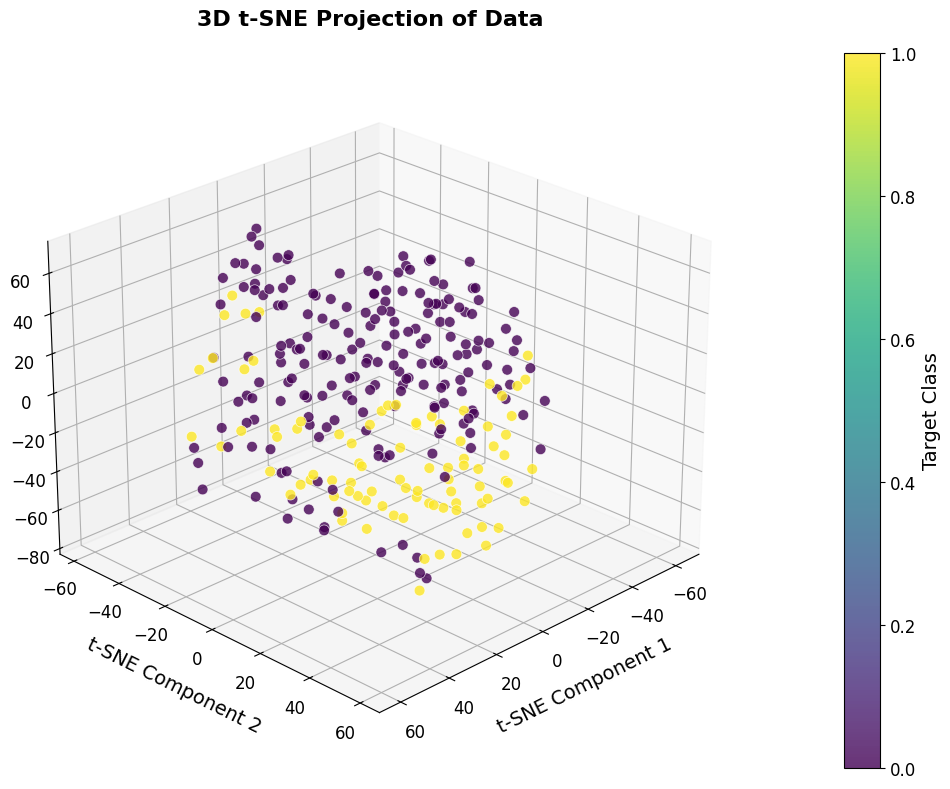

In [25]:
# Enhanced 3D Visualization of t-SNE for a more attractive plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with customized markers and color
scatter = ax.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], X_train_tsne[:, 2],
                     c=y_train, cmap='viridis', alpha=0.8, s=60, edgecolors='w', linewidth=0.5)

# Set axis labels with larger fonts
ax.set_xlabel('t-SNE Component 1', fontsize=14, labelpad=10)
ax.set_ylabel('t-SNE Component 2', fontsize=14, labelpad=10)
ax.set_zlabel('t-SNE Component 3', fontsize=14, labelpad=10)

# Set title with a larger font size and centered alignment
ax.set_title('3D t-SNE Projection of Data', fontsize=16, fontweight='bold', pad=20)

# Add grid for better readability
ax.grid(True, linestyle='--', color='gray', alpha=0.6)

# Add color bar with title and improved appearance
cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Target Class', fontsize=14)
cbar.ax.tick_params(labelsize=12)

# Increase font size for ticks
ax.tick_params(axis='both', which='major', labelsize=12)

# Adjust the viewing angle for a better perspective
ax.view_init(elev=25, azim=45)

# Show the plot
plt.tight_layout()
plt.show()


<ipython-input-27-417b6f6266b7>:13: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X_train_tsne[class_1, 0], X_train_tsne[class_1, 1], X_train_tsne[class_1, 2],


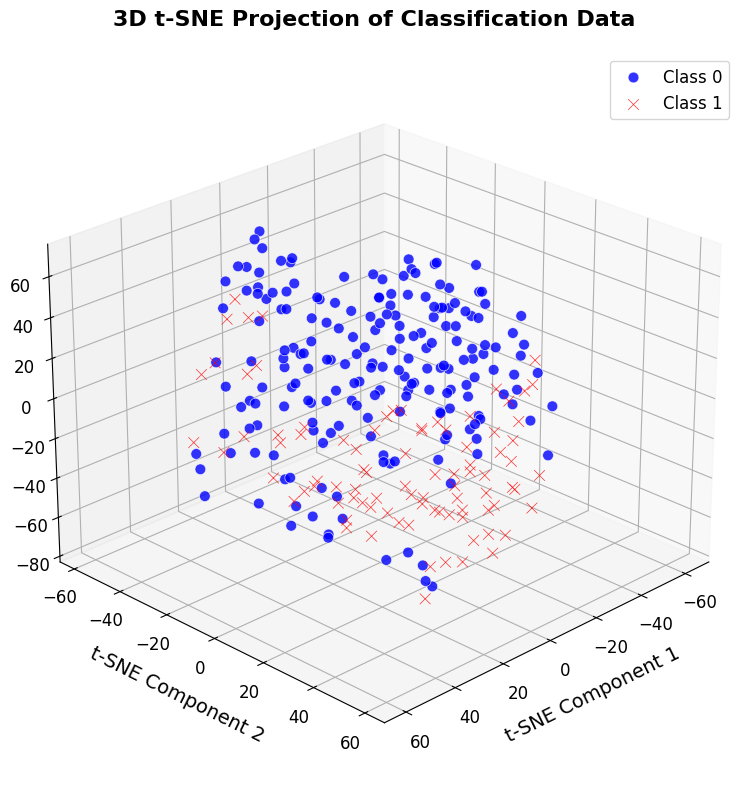

In [27]:
# Enhanced 3D Visualization for Binary Classification Task
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Use two different markers for the two classes (e.g., 'o' for one class and 'x' for the other)
class_0 = y_train == 0
class_1 = y_train == 1

# Scatter plot with customized markers and color for two classes
ax.scatter(X_train_tsne[class_0, 0], X_train_tsne[class_0, 1], X_train_tsne[class_0, 2],
            c='blue', marker='o', alpha=0.8, label='Class 0', s=60, edgecolors='w', linewidth=0.5)

ax.scatter(X_train_tsne[class_1, 0], X_train_tsne[class_1, 1], X_train_tsne[class_1, 2],
            c='red', marker='x', alpha=0.8, label='Class 1', s=60, edgecolors='w', linewidth=0.5)

# Set axis labels with larger fonts
ax.set_xlabel('t-SNE Component 1', fontsize=14, labelpad=10)
ax.set_ylabel('t-SNE Component 2', fontsize=14, labelpad=10)
ax.set_zlabel('t-SNE Component 3', fontsize=14, labelpad=10)

# Set title with a larger font size and centered alignment
ax.set_title('3D t-SNE Projection of Classification Data', fontsize=16, fontweight='bold', pad=20)

# Add grid for better readability
ax.grid(True, linestyle='--', color='gray', alpha=0.6)

# Add legend for class distinction
ax.legend(fontsize=12)

# Add color bar with title and improved appearance (optional if you want to use colors instead of markers)
# cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
# cbar.set_label('Target Class', fontsize=14)
# cbar.ax.tick_params(labelsize=12)

# Increase font size for ticks
ax.tick_params(axis='both', which='major', labelsize=12)

# Adjust the viewing angle for a better perspective
ax.view_init(elev=25, azim=45)

# Show the plot
plt.tight_layout()
plt.show()


Feature Importance Scores (Kernel PCA with mutual information mapped to original features):
Total_SF_Score                    0.103204
Physical_Health_Summary           0.097180
Vitality                          0.084336
Role_Physical                     0.082780
Mental_Health                     0.080931
Role_Emotional                    0.072625
Bodily_Pain                       0.072550
Physical_Functioning              0.067841
General_Health                    0.041085
Age_of_Participants               0.038155
Marital_Status                    0.030650
Social_Functioning                0.027507
Type_of_Family                    0.022981
Frequency_of_Blood_Transfusion    0.019723
Occupational_Status               0.018484
Previous_3Months_Transfution      0.017092
Severity                          0.016238
Ironchelating_Therapy_Status      0.014041
Economic_Class                    0.013343
Transfusion_Status                0.013317
Splenectomy_Status                0.013014
Gende

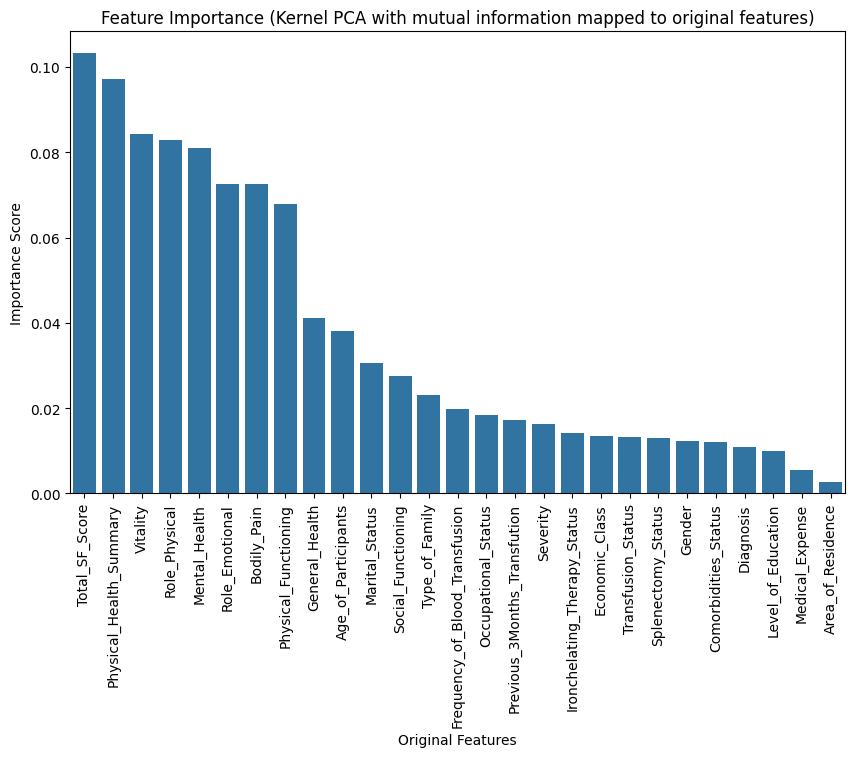


Selected Features (Threshold-Based Selection):
Total_SF_Score                    0.103204
Physical_Health_Summary           0.097180
Vitality                          0.084336
Role_Physical                     0.082780
Mental_Health                     0.080931
Role_Emotional                    0.072625
Bodily_Pain                       0.072550
Physical_Functioning              0.067841
General_Health                    0.041085
Age_of_Participants               0.038155
Marital_Status                    0.030650
Social_Functioning                0.027507
Type_of_Family                    0.022981
Frequency_of_Blood_Transfusion    0.019723
Occupational_Status               0.018484
Previous_3Months_Transfution      0.017092
Severity                          0.016238
Ironchelating_Therapy_Status      0.014041
Economic_Class                    0.013343
Transfusion_Status                0.013317
Splenectomy_Status                0.013014
Gender                            0.012360
Comorb

In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import StratifiedKFold
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Initialize StratifiedKFold for cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Arrays to hold feature importance scores across folds
importance_scores = np.zeros(X.shape[1])

# Perform cross-validation
for train_index, test_index in kf.split(X_scaled, y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Apply Kernel PCA to reduce dimensionality (using RBF kernel)
    kpca = KernelPCA(kernel='rbf', n_components=min(len(np.unique(y)) - 1, X_train.shape[1]))
    X_train_kpca = kpca.fit_transform(X_train)
    X_test_kpca = kpca.transform(X_test)

    # Evaluate the importance of Kernel PCA components using mutual information
    mi = mutual_info_classif(X_train_kpca, y_train)
    kpca_importance = pd.Series(mi, index=[f'KPC{i+1}' for i in range(X_train_kpca.shape[1])]).sort_values(ascending=False)

    # Calculate the importance of the original features based on KPCA components
    for i in range(X_train_kpca.shape[1]):
        # Calculate feature contribution using loadings from the KPCA transformation
        feature_contribution = np.abs(X_train_kpca[:, i].dot(X_train))
        importance_scores += feature_contribution / np.sum(feature_contribution)

# Average the importance scores across folds
importance_scores /= kf.n_splits
original_feature_importance_series = pd.Series(importance_scores, index=X.columns).sort_values(ascending=False)

# Print the feature importance scores of the original features
print("Feature Importance Scores (Kernel PCA with mutual information mapped to original features):")
print(original_feature_importance_series)

# Plot the feature importance of the original features
plt.figure(figsize=(10, 6))
sns.barplot(x=original_feature_importance_series.index, y=original_feature_importance_series.values)
plt.title('Feature Importance (Kernel PCA with mutual information mapped to original features)')
plt.xlabel('Original Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=90)
plt.show()

# Threshold-Based Selection
threshold = 0.003
selected_features_threshold = original_feature_importance_series[original_feature_importance_series > threshold]
print("\nSelected Features (Threshold-Based Selection):")
print(selected_features_threshold)

# Top-N Features Selection
top_n = 10
selected_features_top_n = original_feature_importance_series.head(top_n)
print(f"\nSelected Top-{top_n} Features:")
print(selected_features_top_n)

# Cumulative Importance Selection
cumulative_importance_threshold = 0.80
cumulative_importance = original_feature_importance_series.cumsum() / original_feature_importance_series.sum()
selected_features_cumulative = original_feature_importance_series[cumulative_importance <= cumulative_importance_threshold]
print(f"\nSelected Features (Cumulative Importance up to {cumulative_importance_threshold * 100}%):")
print(selected_features_cumulative)
